In [1]:
#you first need to download the data from teams and put it in the same folder as this to be able to load the script
#the time is in duration (timedelta) format so that needs to be changed in the future
#here i load the libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import datetime
sns.set_theme()

In [2]:
January=pd.read_csv('January.csv')
January.drop('Unnamed: 0',axis=1,inplace=True)
January.info()
January

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458998 entries, 0 to 5458997
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 416.5+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01T00:10:00Z,2016-01-01T00:10:00Z,PT0S
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01T00:10:00Z,2016-01-01T00:10:00Z,PT0S
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01T00:11:00Z,2016-01-01T00:11:00Z,PT0S
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01T00:11:00Z,2016-01-01T00:11:00Z,PT0S
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01T00:11:00Z,2016-01-01T00:11:00Z,PT0S
...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31T22:58:00Z,2016-01-31T22:58:00Z,PT0S
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31T23:00:00Z,2016-01-31T23:00:00Z,PT0S
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31T23:00:00Z,2016-01-31T23:00:00Z,PT0S
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31T23:01:00Z,2016-01-31T23:01:00Z,PT0S


In [3]:
#First I make a date from the date planned departure, then i make it a string in a new column so i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
January['Train Departure Planned']=pd.to_datetime(January['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
January['Train Departure Planned1']=January['Train Departure Planned'].astype(str)
January[['DepartureDatePlanned','DepartureTimePlanned']]= January['Train Departure Planned1'].str.split(' ', expand = True)
January['DepartureDatePlanned']=pd.to_datetime(January['DepartureDatePlanned'])
January
#then i make the planned depature time a time delta (Actually want to make it a normal time format)
January['DepartureTimePlanned'] = January.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
January.drop('Train Departure Planned1', axis=1, inplace=True)
print(January.info())
January

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458998 entries, 0 to 5458997
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 499.8+ MB
None


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01 00:10:00,2016-01-01T00:10:00Z,PT0S,2016-01-01,00:00:00
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01 00:10:00,2016-01-01T00:10:00Z,PT0S,2016-01-01,00:00:00
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01 00:11:00,2016-01-01T00:11:00Z,PT0S,2016-01-01,00:00:00
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01 00:11:00,2016-01-01T00:11:00Z,PT0S,2016-01-01,00:00:00
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01 00:11:00,2016-01-01T00:11:00Z,PT0S,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31 22:58:00,2016-01-31T22:58:00Z,PT0S,2016-01-31,00:00:00
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31 23:00:00,2016-01-31T23:00:00Z,PT0S,2016-01-31,00:00:00
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31 23:00:00,2016-01-31T23:00:00Z,PT0S,2016-01-31,00:00:00
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31 23:01:00,2016-01-31T23:01:00Z,PT0S,2016-01-31,00:00:00


In [4]:
# here i basically do the same but for the actual depature
January['Train Departure Actual']=pd.to_datetime(January['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
January['Train Departure Actual1']=January['Train Departure Actual'].astype(str)
January[['DepartureDateActual','DepartureTimeActual']]= January['Train Departure Actual1'].str.split(' ', expand = True)
January['DepartureDateActual']=pd.to_datetime(January['DepartureDateActual'])
January
January['DepartureTimeActual'] = January.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
January.drop('Train Departure Actual1', axis=1, inplace=True)
print(January.info())
January

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458998 entries, 0 to 5458997
Data columns (total 14 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     datetime64[ns]
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
 12  DepartureDateActual        datetime64[ns]
 13  DepartureTimeActual        object        
dtypes: datetime64[ns](4), int64(1), object(9)
memory usage: 583.1+ MB
None


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01 00:10:00,2016-01-01 00:10:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01 00:10:00,2016-01-01 00:10:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01 00:11:00,2016-01-01 00:11:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01 00:11:00,2016-01-01 00:11:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01 00:11:00,2016-01-01 00:11:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31 22:58:00,2016-01-31 22:58:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31 23:01:00,2016-01-31 23:01:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00


In [129]:
#Then i also put the delay in time delta format
# January['Train Delay']=pd.to_timedelta(January['Train Delay'].str.strip())
# January

## Percentage of delays for January

Here we will calculate the percentage of delays for the whole January. It is done by dividing the delays with all departures and multiplying by 100.

In [97]:
from datetime import timedelta
delta = timedelta(
    minutes=0,
)
def percentage(part, whole):
  return 100 * float(part)/float(whole)

total = len(January)
delays = len(January[January['Train Delay'] > delta])
perc = percentage(delays,total)

print('The count of delays: {}'.format(delays))
print('The total train departures count: {}'.format(total))
print('Percentage of delay for January: {:.6f}'.format(perc))

The count of delays: 2046304
The total train departures count: 5458998
Percentage of delay for January: 37.484974


The percentage is 37%. 

We can also show the delays between the different train companies to get a better insight. This can be done using pie plot.

In [125]:
import matplotlib.pyplot as plt

# Percentage calculation
compdelays = January[January['Train Delay'] > delta].groupby(['Train Company'])['Train Delay'].count().reset_index()
compdelays['Percentage (of total)'] = compdelays['Train Delay'] / total * 100
compdelays['Percentage (of companies)'] = compdelays['Train Delay'] / delays * 100
compdelays = compdelays.sort_values(by="Train Delay", ascending=False)

compdelays

,Train Company,Train Delay,Percentage (of total),Percentage (of companies)
6,NS,1707131,31.271874,83.425092
0,Arriva,213745,3.915462,10.445418
9,Veolia,82405,1.509526,4.027017
8,Valleilijn,19526,0.357685,0.954208
7,Syntus,9333,0.170965,0.456091
1,Breng,5643,0.103371,0.275765
5,NMBS,4570,0.083715,0.223329
2,DB,3389,0.062081,0.165616
4,LTE,354,0.006485,0.017299
3,Keolis,192,0.003517,0.009383


<BarContainer object of 11 artists>

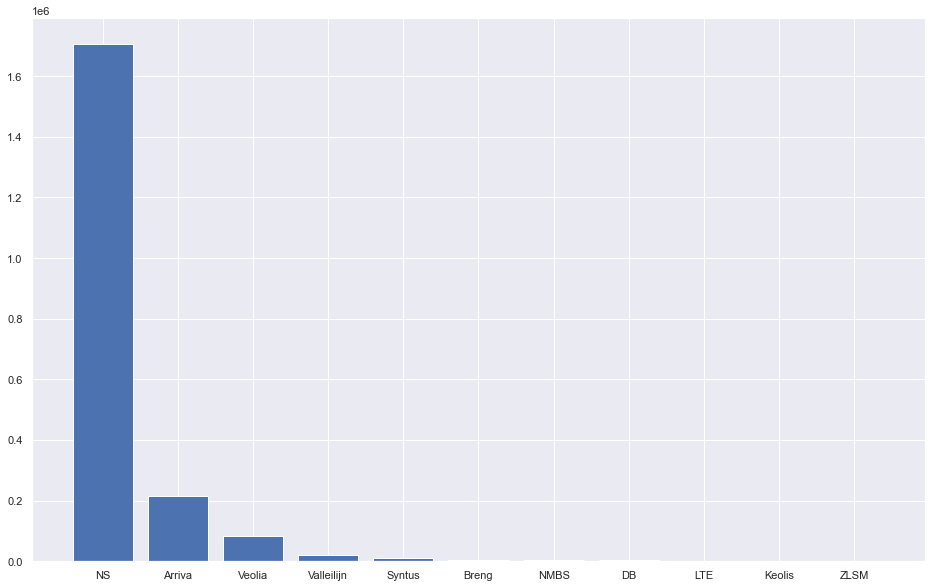

In [128]:
plt.figure(figsize=(16,10))
plt.bar(compdelays['Train Company'],compdelays['Train Delay'])

Here we see the delay percentage of the total train departures and the percentage between the other train companies.

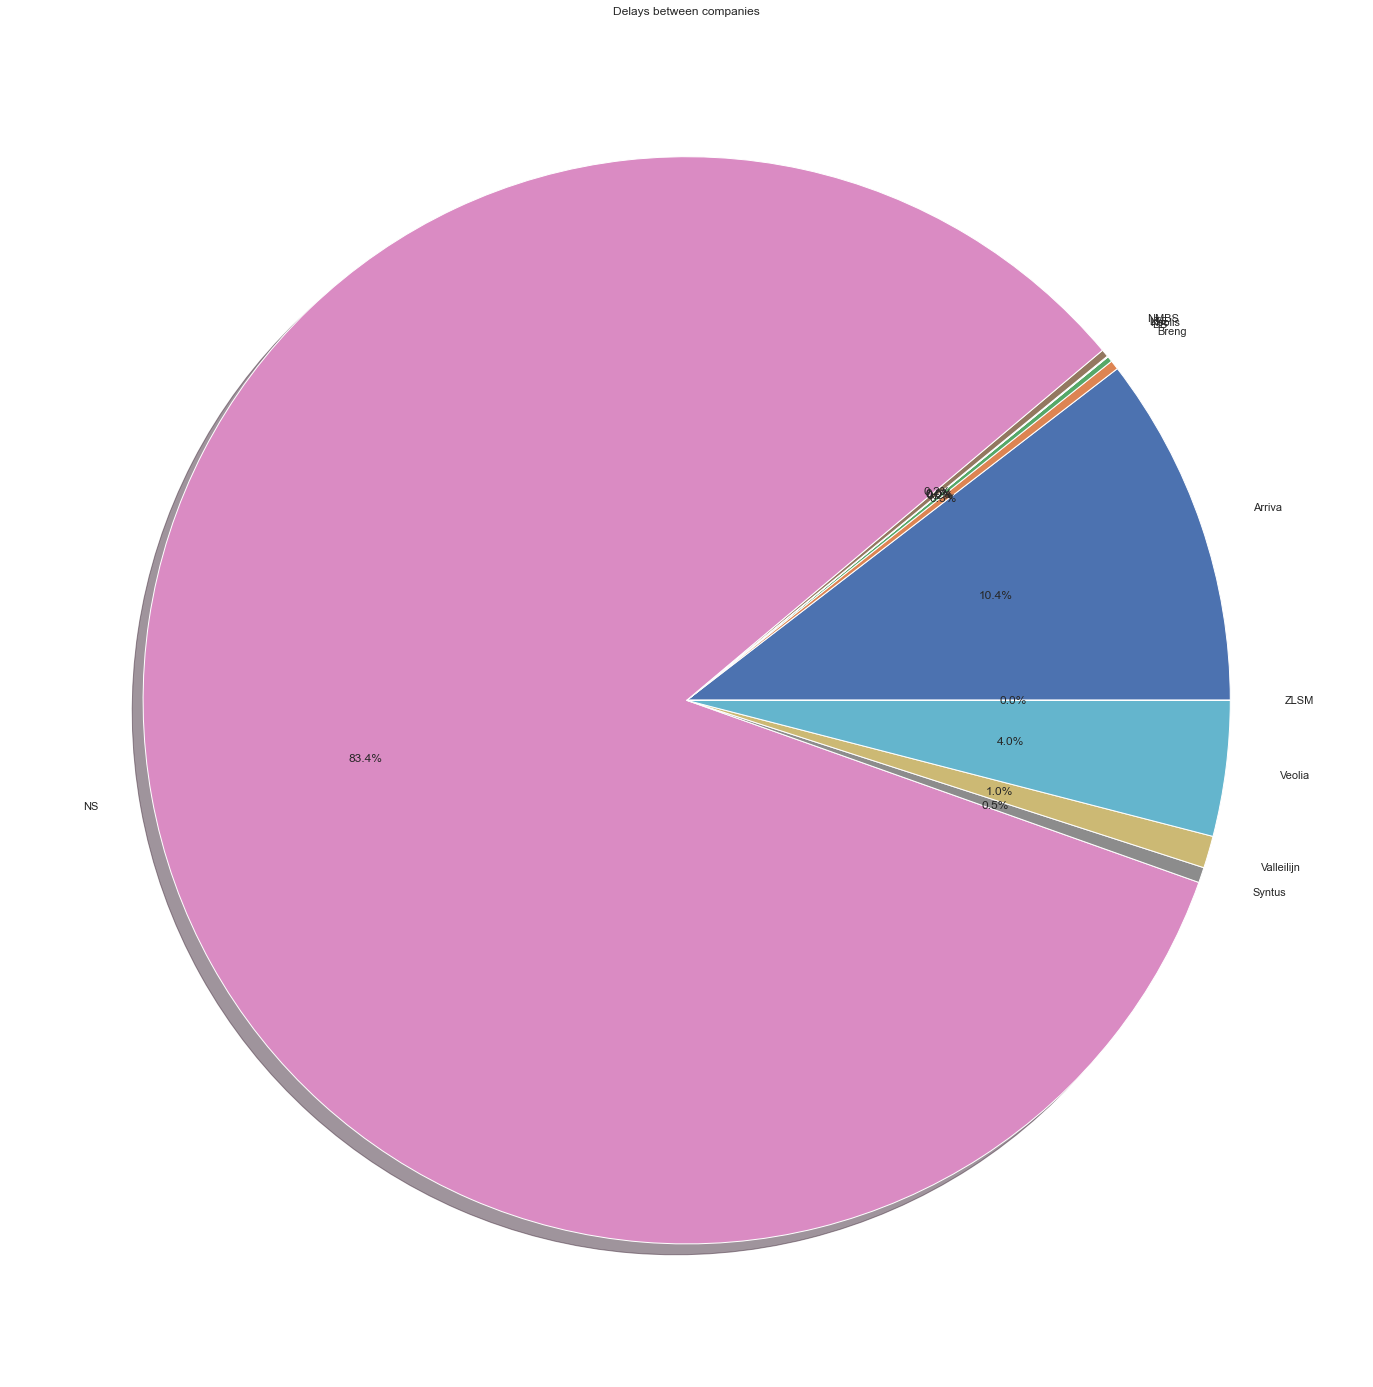

In [111]:
def func(pct):
  return "{:1.1f}%".format(pct)

plt.figure(figsize=(25,25))
plt.pie(compdelays['Train Delay'], labels=compdelays['Train Company'], autopct=lambda pct: func(pct), shadow=True)
plt.title('Delays between companies')
plt.show()

From the plot we see that NS have the most delays compared to the other companies.

In addition, we can plot the stations where delay occurs (may be useful). We are getting only the top 12 stations, sorted from least to most delays in the bar plot.

Number of stations: 401


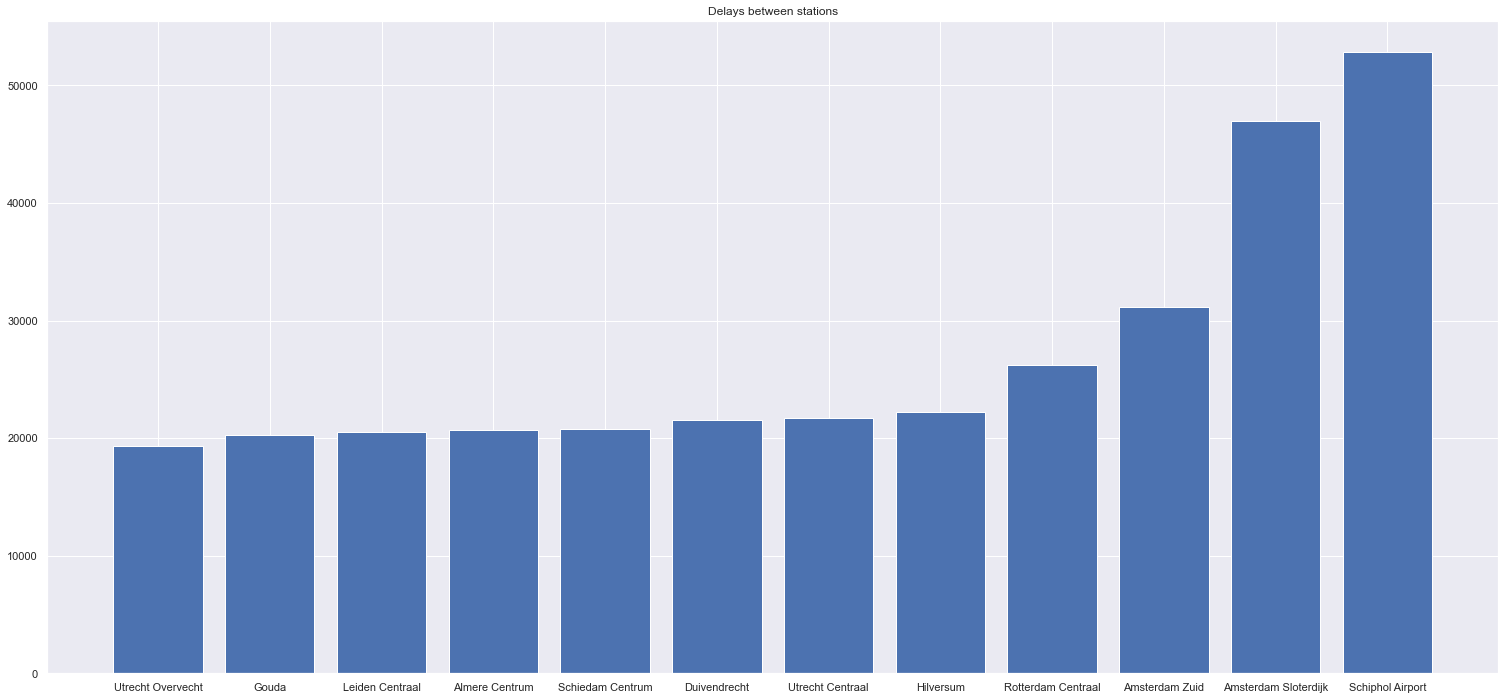

In [99]:
print("Number of stations: {}".format(len(January[January['Train Delay'] > delta]['Station Name'].unique())))

compdelays = January[January['Train Delay'] > delta].groupby(['Station Name'])['Train Delay'].count().reset_index().sort_values(by=['Train Delay'])[-12:]
 
plt.figure(figsize=(26,12))
plt.bar(compdelays['Station Name'],compdelays['Train Delay'])
plt.title('Delays between stations')
plt.show()

We observe that Schiphol Airport, Amsterdam Sloterdijk, Amsterdam Zuid and Rotterdam Centrall have the most delays for January.